# All Imports

In [16]:
# Core
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Non-Geospatial
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import imageio
import scipy.ndimage as ndi
from skimage import filters
from skimage.util import apply_parallel

# Geospatial
import rasterio
import geopandas
from pyproj import Transformer

# Jupyter Notebooks

Jupyter Notebooks are way to interactively write programs.  While we'll use notebooks to write Python, you can use them to write in any number of languages.

Jupyter has <b>cells</b> or <b>code blocks</b>.  The open space lets you write text or programs.  If you're writing text, we indicate that the cell is a <b>markdown</b> cell.  You can use the GUI above to declare a cell a markdown cell, or you can use hotkeys.  You'll get more familiar with these as you go.

If you click into a codeblock, you can also also observe the color.  If it's green, you're currently editing.  If it's blue, you can enter the <b>command mode</b> where you can do things like change the type of cell from markdown to a <b>code</b> cell.  If you hit <b>escape</b> you change from editing to command mode.  Go to the <b>help</b> menu above and choose <b>keyboard shortcuts</b>.  These are handy keys to do things like insert blocks, run code blocks, and so on.  

<b>Before you begin, rename this file by clicking on the title at the top, and adding your last name to the beginning of the filename.  You'll upload this file later for credit.</b>

Let's try writing some simple code, just to see how Jupyter works.

In [1]:
# Comments work just as before
# Hit shift-enter to run this code

x = 5
print(x)

5


In [2]:
a = 2
b = 9
c = a + b
print(c)

11


In [3]:
for i in range(10):
    print(i**2)

0
1
4
9
16
25
36
49
64
81


<font color='red'>Play along! Write a few codeblocks worth of simple python code like you see above, and run them.</font>

# NumPy and Matplotlib

One of the handier toolkits in Python is <a href="https://en.wikipedia.org/wiki/NumPy" target="_blank">NumPy</a> (for simplicity, we'll drop the mixed case from here on out, and just call it numpy).  Numpy is a suite of tools for performing all types of calculation, particularly involving arrays and matrices.  It is the backbone of <a href="https://en.wikipedia.org/wiki/SciPy" target="_blank">SciPy</a> which includes many other components, including statistical processing.  <a href="https://en.wikipedia.org/wiki/Matplotlib" target="_blank">Matplotlib</a> is the third package we'll see today.  It's used to graph data.

In [4]:
# We load these with import statements.  

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# We often create arrays using arange, which species a start, stop, and (optionally) step.  Note that the syntax goes up to
# but NOT INCLUDING the terminal value.  Decimals follow the same syntax.

a = np.arange(0,10,2)
print(a)

[0 2 4 6 8]


In [6]:
# We can also specify arrays using linspace, which takes a start, stop, and resolution (number of points).  Unlike arange,
# it does include the terminal value

a = np.linspace(0,10,5)
print(a)

[ 0.   2.5  5.   7.5 10. ]


In [7]:
# We can also specify arrays manually in the form of a square-bracketed list.

a = np.array([1, 3, 9, 2, 6])
print(a)

[1 3 9 2 6]


In [8]:
# The GREAT thing about numpy is that we can perform operations (add, subtract, multiply) on arrays as if they were single
# numbers, and the computers figures this out in a pairwise way:

a = np.array([1,6,9,10])
b = np.array([5,2,4,12])
print(a+b)
print(a-b)
print(a*b)
print(a**3)

[ 6  8 13 22]
[-4  4  5 -2]
[  5  12  36 120]
[   1  216  729 1000]


In [9]:
# You can also perform operations on arrays using scalar values like so:

x = np.array([2,4,5,9])
y = 2 * x
print(y)

[ 4  8 10 18]


<font color='red'>Play along!  Make some arrays, and perform some operations on them.  What happens if the arrays aren't the same size?</font>

## Generating random numbers

We'll use numpy later as part of a way to analyze rasters.  But for now, let's take a look at one of the useful features for modeling: random numbers.

Random number generators are crucial for modeling.  They let us take deterministic models, where everything is known, and add a layer of unpredictability.  There are many random number generators in numpy, but we'll use two: a <a href="https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.rand.html#numpy.random.rand" target="_blank">uniform random number generator</a>, and a <a href="https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.randn.html#numpy.random.randn" target="_blank">normal distribution random number generator</a>.

In [10]:
# Run this code block several times.
# Hitting control-enter instead of shift-enter will keep you focused on the same codeblock instead of advancing to the next.

x = np.random.rand(1)
print(x)

[0.41740973]


In [11]:
# You can generate a lot of random numbers

x = np.random.rand(100000)

In [12]:
# And in more than one dimension

x = np.random.rand(100,100)

In [13]:
# And use scale and offset parameters to change their value

x = np.random.rand(10000)
print('min:',np.min(x))
print('max:',np.max(x))

print('')

x = 100 * np.random.rand(10000) + 5
print('min:',np.min(x))
print('max:',np.max(x))

min: 0.0001284558800702662
max: 0.9999377244961284

min: 5.004074667265918
max: 104.9908106026705


In [14]:
# And you can generate random numbers for any kind of distrubtion.  This is a normally distributed set, with a
# nominal mean of zero and a standard deviation of 1

x = np.random.randn(10000)
print('min :',np.min(x))
print('max :',np.max(x))
print('mean:',np.mean(x))
print('std :',np.std(x))

min : -3.757272094841609
max : 4.2506837332909555
mean: 0.016977032108273594
std : 0.9896574477722593


# Matplotlib

Matplotlib is generally used to visualize data.  The most common of these are lineplots, scatterplots, histograms, and array/image visualization.  Colors are controlled with a [linespec](https://www.mathworks.com/help/matlab/creating_plots/specify-line-and-marker-appearance-in-plots.html).

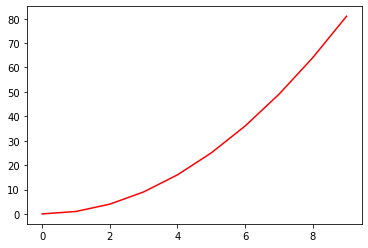

In [15]:
# Lineplot

x = np.arange(0,10)
y = x**2

plt.plot(x,y,'r-')

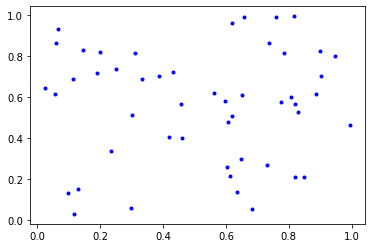

In [16]:
# Scatterplot

x = np.random.rand(50)
y = np.random.rand(50)

plt.plot(x,y,'b.')

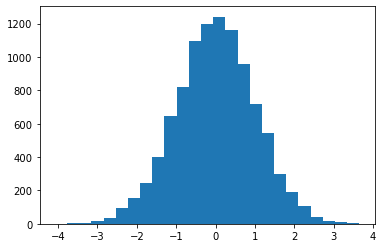

In [17]:
# Histogram

x = np.random.randn(10000)

_ = plt.hist(x,bins=25)

(0.009496973308120715,
 0.9958107119288966,
 0.020220103001977074,
 1.006533841622753)

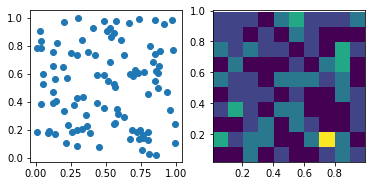

In [18]:
# 2D Histograms

x,y = np.random.rand(2,100)

plt.subplot(1,2,1)
plt.scatter(x,y)
plt.axis('square')

plt.subplot(1,2,2)
_ = plt.hist2d(x,y)
plt.axis('square')

[[-0.73 -1.78  0.79  0.92 -0.34  1.66  0.69  0.36 -0.25 -1.39]
 [ 0.37 -0.22 -0.67  1.89  0.53 -1.28 -0.59 -0.34  1.11 -0.67]
 [ 0.72 -2.09  0.12  1.7  -0.85 -2.37 -1.83 -0.47  1.06 -0.47]
 [ 1.01 -1.27 -0.47 -1.61 -1.32  0.22  0.14  2.03 -0.23  0.81]
 [ 0.81  0.45 -1.5   0.83 -0.15  0.92 -0.03  0.65  1.17  0.13]
 [ 0.92 -0.57  0.58  0.28 -0.85  2.24  1.11 -0.23 -1.23  1.49]
 [-1.45  0.35 -1.24 -0.83  1.76  0.79  0.07  0.95  0.83 -0.03]
 [ 0.63  0.22 -0.45 -1.43  0.34 -1.34 -0.46 -0.49 -0.51  0.58]
 [ 1.   -0.6   0.81  1.68 -0.44 -0.17 -1.25  2.37 -0.55  0.04]
 [ 0.18  1.36  0.65  0.24 -1.85 -1.02  0.53 -0.62  1.99  1.79]]


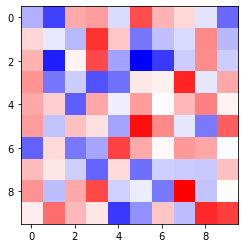

In [19]:
# Array-as-image visualization

x = np.random.randn(10,10)

print(np.round(x,2))
plt.imshow(x,cmap='bwr')

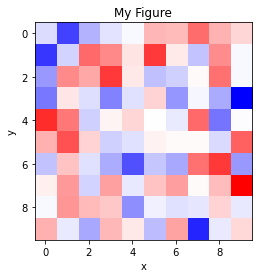

In [20]:
# You can add titles, axis labels, legends, etc., and
# plots can be easily saved with .savefig, but you need to do it in frame:

x = np.random.randn(10,10)
plt.imshow(x,cmap='bwr')
plt.title('My Figure')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('myplot.png',dpi=300)

<font color='red'>Play along!  Generate your own data, and then plot it using the methods above.</font>

# Pandas

In [21]:
import pandas as pd

### Loading

In [22]:
# Pandas has methods to read CSVs, Excel files, and pretty much any other kind of tabular data.
# It can read straight from the Internet, or from local files.

df = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher_iris_data.csv')

# or

df = pd.read_excel('https://github.com/thomaspingel/geodata/raw/master/fisher_iris_data.xlsx')

### Describing

In [23]:
# Use .head to inspect the top of the file, indicating how many rows you want to see.  The default is 10.

df.head(5)

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


In [24]:
# Use numpy functions to help.  For instance, to get the shape of the table, in rows and cols:

np.shape(df)

(150, 5)

In [25]:
# Or simple Python len() to get the number of rows

len(df)

150

In [26]:
# You can get summary statistics on any field:

df['sepal_length'].mean()

58.446666666666665

In [27]:
# Or using numpy:

np.mean(df['sepal_length'])

58.446666666666665

In [28]:
# Or all at once

df.describe()

,petal_width,petal_length,sepal_width,sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,11.926667,37.786667,30.553333,58.446667
std,7.569008,17.776233,4.372791,8.268592
min,1.000000,10.000000,20.000000,43.000000
25%,3.000000,16.000000,28.000000,51.000000
50%,13.000000,44.000000,30.000000,58.000000
75%,18.000000,51.000000,33.000000,64.000000
max,25.000000,69.000000,44.000000,79.000000


### Calculation

In [29]:
# You can calculate new rows:

df['petal_thinness'] = df['petal_length'] / df['petal_width']
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length,petal_thinness
0,setosa,2,14,33,50,7.0
1,setosa,2,10,36,46,5.0
2,setosa,2,16,31,48,8.0
3,setosa,1,14,36,49,14.0
4,setosa,2,13,32,44,6.5


### Plotting

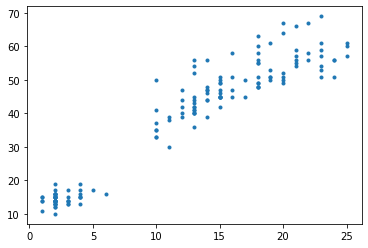

In [30]:
# You can use matplotlib to visualize:

plt.plot(df['petal_width'],df['petal_length'],'.')

<AxesSubplot:title={'center':'petal_width'}, xlabel='species'>

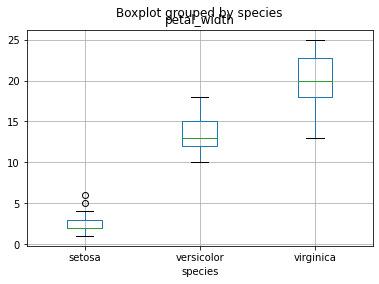

In [31]:
# Or use a variety of embedded plot routines for specialized plots

pd.plotting.boxplot(df,column='petal_width',by='species')

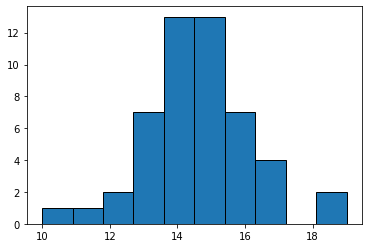

In [32]:
# You can select using a .loc operator with boolean statements like so:

just_setosa = df.loc[df['species']=='setosa']
_ = plt.hist(just_setosa['petal_length'],edgecolor='k')

### Grouping

In [33]:
# Pandas can group and calcuate data, much like Pivot Tables in Excel:

groups = df.groupby(by='species')
groups.mean()

,petal_width,petal_length,sepal_width,sepal_length,petal_thinness
species,,,,,
setosa,2.46,14.62,34.28,50.10,6.908000
versicolor,13.26,43.22,27.64,59.36,3.295145
virginica,20.06,55.52,29.74,65.88,2.815445


### Saving

In [34]:
# You can write your data out again.  
# By default, pandas adds a unique "key" index, so you may wish to not write this back out:

just_setosa = df.loc[df['species']=='setosa']

just_setosa.to_csv('just_setosa.csv',index=False)

<font color='red'>Play along!  Can you load some of your own data, and use the commands above to visualize and make calculations on it?</font>

# What else?

### <u>scipy.stats</u> for simple statistics

In [71]:
from scipy import stats

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher_iris_data.csv')

In [73]:
# Correlations

r,p = stats.pearsonr(df['petal_width'],df['petal_length'])
print('r =',r,', p =',p)

r = 0.9559018929491592 , p = 1.2082268268084072e-80


In [80]:
# T-Tests

idx1 = df['species'] == 'setosa'
idx2 = df['species'] == 'virginica'

stats.ttest_ind(df.loc[idx1,'petal_width'],df.loc[idx2,'petal_width'])

Ttest_indResult(statistic=-40.30191682308372, pvalue=8.300636479623552e-63)

### <u>seaborn</u> for more sophisticated visualizations

In [38]:
import seaborn as sns

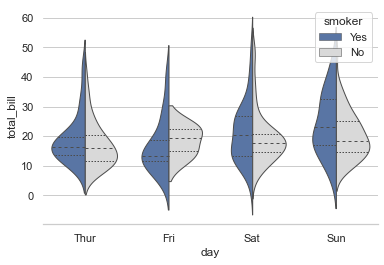

In [39]:
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

### <u>statsmodels</u> for simple regression

#### Regression is a big topic, too big to cover in full here.  For more information on specifying models and handling missing data, [see the two regression notebooks for the Analysis in GIS course](https://github.com/thomaspingel/analysis_in_gis).

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
# Then run the regression
results = smf.ols(formula='petal_width ~ petal_length',data=df).fit()

# Note: if you have missing data, you'll want to 

# Print the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1568.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.21e-80
Time:                        23:47:21   Log-Likelihood:                -332.16
No. Observations:                 150   AIC:                             668.3
Df Residuals:                     148   BIC:                             674.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.4532      0.429     -8.050   

<font color='red'>Play along!  Try to use each of these packages to produce output on your own dataset<font>

# Image Processing

## imageio and colormaps

I use [imageio](https://imageio.readthedocs.io/en/stable/) for most simple reading and writing of image data.  Many other packages we'll look at can also load images directly, including [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html).  

In [42]:
import imageio

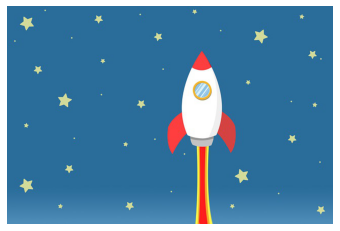

In [66]:
# Simple RGB images can be read this way, both from the Internet and locally

I = imageio.imread('https://github.com/thomaspingel/geodata/raw/master/rocket.jpg')
plt.imshow(I)
_ = plt.axis('off')

In [67]:
# Remember that images are just multidimensional arrays!

np.shape(I)

(427, 640, 3)

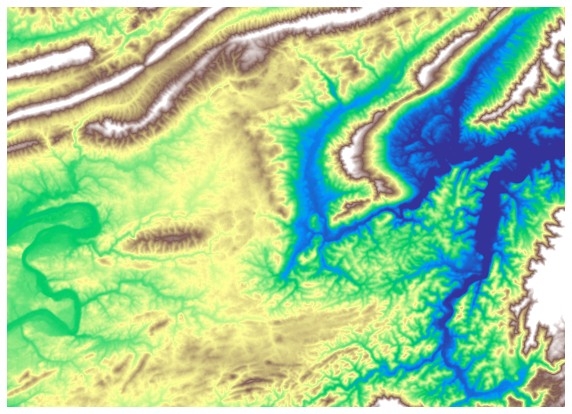

In [44]:
# Most raster geodata is stored in simple containers like TIFF, so it's readable the same way.

# The difference is that a colormap gets applied to the raw data to visualize it.

# Although not required, vmin and vmax can be helpful to set to enhance contrast.  Otherwise, they'll just be
# set to the min and max of the dataset.

# Figsize is used here to make the image larger.

# cmap controls the colormap.  There are a VERY large number of these.  See 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# and 
# https://www.kennethmoreland.com/color-advice for a discussion.
# and
# https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html - a favorite of mine.

I = imageio.imread('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')
plt.figure(figsize=(10,10))
plt.imshow(I,cmap='terrain',vmin=np.percentile(I,2.5),vmax=np.percentile(I,97.5))
_ = plt.axis('off')

<font color='red'>Play along!  Load some of your own image data, and visualize it using different colormaps, etc.</font>

## ndimage

[ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) is SciPy's embedded image processing toolkit.  It's immensely powerful, and you should take a moment to immediately review what's in this toolkit.  I'll show a couple of my favorite applications.

In ArcGIS, [focal statistics](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/focal-statistics.htm) are used to calculate means, standard deviations, and other descriptive statistics within a  predefined area.  This area could be a circle or square around a central point, or even more advanced structures.  In the python universe, we'd call these [structuring elements](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.generate_binary_structure.html) rather than neighborhoods.

Read more about the [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve) operator, but we'll see a few examples:

In [69]:
import scipy.ndimage as ndi

I = imageio.imread('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')

#### Neighborhood average: This will act to "blur" the surface

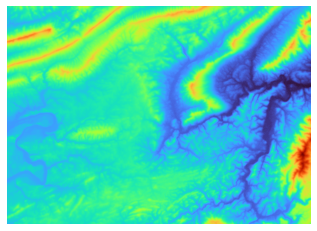

In [70]:
# Make a structuring element.  This is 5x5 of ones, and the result is divided by the total number, making this
# a moving average.  The 5x5 can be whatever you wnat, but make sure it's an odd number to center correctly on the 
# middle pixel.  The bigger it is, the longer it will take!

w = 5

S = np.ones((w,w))
S = S / np.size(S)

A = ndi.convolve(I,S)
plt.imshow(A,cmap='turbo')
_ = plt.axis('off')

#### Other built-in filters

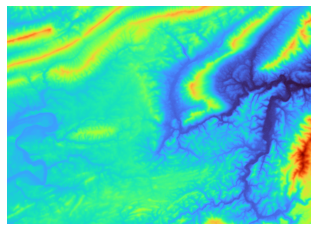

In [47]:
# Some built-in filters let you specify either the size or the footprint

A = ndi.median_filter(I,size=(5,5))
plt.imshow(A,cmap='turbo')
_ = plt.axis('off')

#### The generic filter

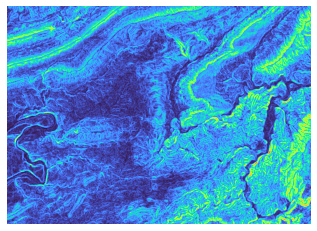

In [48]:
# The generic filter handle lets you pass in any other kind of function you might need from numpy, or even one you
# write yourself.  The flexibility here comes at a cost; generic_filter is often a little slow.  But it is a lot faster
# than writing it yourself!

A = ndi.generic_filter(I,np.std,size=(5,5))
plt.imshow(A,cmap='turbo')
_ = plt.axis('off')

#### Spatial Isn't <i>That</i> Special: Curvature

The curvature function descibres the rate of change of slope.  There are many ways to approach curvature!  (see [Minar et al. 2020](https://doi.org/10.1080/13658810310001596058)).  One is simply to use the laplacian operator.  It's very fast, and [nearly identical to what you'll find in Arc](https://desktop.arcgis.com/en/arcmap/10.6/tools/spatial-analyst-toolbox/how-curvature-works.htm) (some differences in how missing data is handled and edge effects, and Arc changes the sign and multiplies by 100x).

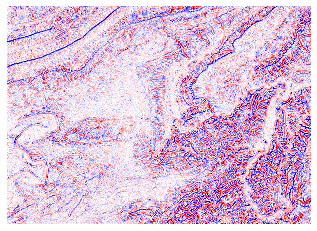

In [49]:
A = ndi.laplace(I)
plt.imshow(A,cmap='bwr',vmin=-2,vmax=2)
_ = plt.axis('off')

#### Interpolation on an Image: An example to generate transects

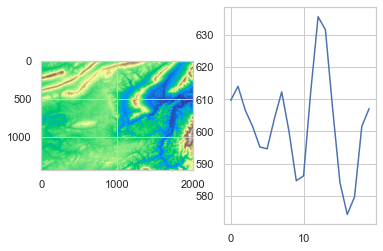

In [50]:
# Note: this is a simple example to show how easily transects can be generated from pixel coords
# For geographic coords, see later geospatial examples.

# Number of points in the transect
resolution = 20

X = imageio.imread('https://github.com/thomaspingel/geodata/raw/master/nasadem_blacksburg_area.tif')
plt.subplot(1,2,1)
plt.imshow(X,cmap='terrain')

# Given two points, a and b, at random locations in the array.
# Note that these are pixel coordinates (not geocoords) and do not need to be whole numbers.
a,b = [5,7],[88,90]

# Extract transect coordinates
row_points = np.linspace(a[0],b[0],resolution)
col_points = np.linspace(a[1],b[1],resolution)

# Then pull the coordinates:
values = ndi.map_coordinates(X, [row_points, col_points], order=1)

plt.subplot(1,2,2)
plt.plot(values)

## scikit-image

Scikit-Image is another toolbox for taking apart images in a variety of ways.  [Look through the gallery to see what's possible](https://scikit-image.org/).

In [51]:
from skimage import filters
from skimage.data import camera
from skimage.util import apply_parallel

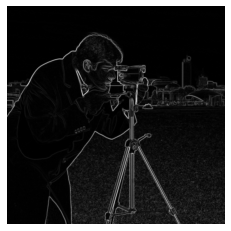

In [52]:
# Edge Filter

image = camera()
edge_sobel = filters.sobel(image)

plt.imshow(edge_sobel,cmap='gray')
_ = plt.axis('off')

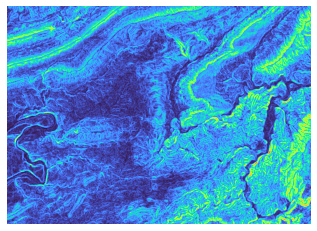

In [53]:
# I use apply_parallel to divide-and-conquer large geospatial images.  It is nice for time consuming processes.

I = imageio.imread('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')

def myfilter(P):
    return ndi.generic_filter(P,np.std,size=(5,5))

A = apply_parallel(myfilter,I.copy(),chunks=500,depth=3)

plt.imshow(A,cmap='turbo')
_ = plt.axis('off')

### Scipy.interpolate

## OpenCV

We may do a whole day unit on [OpenCV](), or I may circle back around here.  

### Other Recommendations

Take a look at [tiffile](https://pypi.org/project/tifffile/) for reading and writing VERY large TIFFs (not so uncommon with geospatial data), [xarray](https://docs.xarray.dev/en/stable/) and [dask](https://dask.org/) for very large data processing, [joblib](https://joblib.readthedocs.io/en/latest/), a favorite for multiprocessing, [NetworkX](https://networkx.org) for network analysis, [colour](https://colour.readthedocs.io/en/latest/index.html#) for scientific color analysis, [scikit-learn](https://scikit-learn.org/stable/) for machine and deep learning.

# Geospatial Packages

## Rasterio

Rasterio builds upon [GDAL](https://gdal.org/), the "swiss army knife" of raster processing, not just in Python but generally.  The reader is recommended to read up on GDAL before processing.  Rasterio simplifies the syntax, and makes it easier (not easy!) to read and write geospatial data, to reproject rasters, and to do simple analysis.

You are strongly encouraged to review the [quickstart](https://rasterio.readthedocs.io/en/latest/quickstart.html) page for Rasterio, and to [browse the documentation](https://rasterio.readthedocs.io/en/latest/index.html).

In [2]:
import rasterio

#### Reading

In [15]:
# Files are generally opened like so:
src = rasterio.open('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')

Transform:
 | 17.49, 0.00, 537546.70|
| 0.00,-17.49, 4130330.76|
| 0.00, 0.00, 1.00|
Coordinate Reference System:
 EPSG:32617


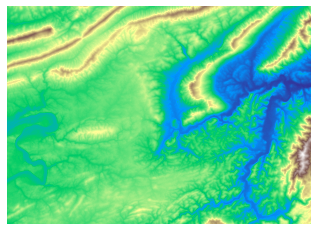

In [17]:
# And then more information can be read, including the image data (one band at a time), the transform, 
# projection information, and so on.

Z = src.read(1)
transform = src.transform
crs = src.crs

print('Transform:\n',transform)

print('Coordinate Reference System:\n',crs)

plt.imshow(Z,cmap='terrain')
_ = plt.axis('off')

In [18]:
# Don't forget to close it!

src.close()

#### Alternative Reading

In [19]:
# Because of all this nitpicky detail, I wrote my own wrapper to replicate the functions of "imread" in other places
# And you can find it copied here and in neilpy: https://github.com/thomaspingel/neilpy

def imread(fn, return_metadata=True, fix_nodata=False, force_float=False):

    with rasterio.open(fn) as src:
        metadata = src.profile
        #metadata['count'] = src.count
        #metadata['crs'] = src.crs
        #metadata['transform'] = src.transform
        metadata['bounds'] = src.bounds
        #metadata['width'] = src.width
        #metadata['height'] = src.height
        metadata['dtype'] = src.dtypes[0]  # This returns an array.  Safe to assume all the same?
        #metadata['nodata_value'] = src.nodatavals[0]
        
        
        if src.count > 1:
            X = np.stack([src.read(i+1) for i in range(src.count)],axis=2)
        else:
            X = src.read(1)
    
    # If asked to force into float, and not already in float, convert.
    if force_float and metadata['dtype'] not in ['float32','float64']:
        X = X.astype(np.float32)
        metadata['dtype'] = 'float32'
    
    # Fix nodata unless told otherwise
    if fix_nodata:
        if metadata['dtype'] in ['float32','float64']:
            X[X==metadata['nodata']] = np.nan
        else:
            print('Warning: fix_nodata requested, but ' + metadata['dtype'] + 
                  ' cannot be converted to np.nan.')
        
    # Calculate cellsize.  If directions are within a tolerance, assume the
    # mean
    cellsizes = np.abs(np.array((metadata['transform'][0],
                                 metadata['transform'][4])))
    if np.diff(cellsizes) < .00000001:
        metadata['cellsize'] = np.mean(cellsizes)
    else:
        metadata['cellsize'] = cellsizes
        
    if return_metadata:
        return X, metadata
    else:
        return X

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.3999999521443642e+38, 'width': 2007, 'height': 1438, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(17.48589996167486, 0.0, 537546.6982884794,
       0.0, -17.48589996167495, 4130330.7579188175), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band', 'bounds': BoundingBox(left=537546.6982884794, bottom=4105186.033773929, right=572640.8995115608, top=4130330.7579188175), 'cellsize': 17.485899961674903}


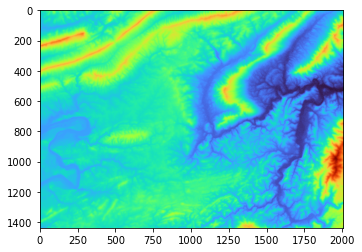

In [21]:
# Now it's a single line to read:

Z, metadata = imread('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')

print(metadata)
plt.imshow(Z,cmap='turbo')

#### Writing

In [22]:
# The syntax for writing data is also a little onerous 
# (see https://rasterio.readthedocs.io/en/latest/quickstart.html#saving-raster-data), 
# so I wrote a writer:

def imwrite(fn,im,metadata=None,colormap=None):
    if metadata is None:
        imageio.imwrite(fn,im)
    else:
        metadata['dtype'] = im.dtype
        with rasterio.open(fn, 'w', **metadata) as dst:
            if np.ndim(im)==2:
                dst.write(im, 1)
                if colormap is not None:
                    dst.write_colormap(1,colormap)
            else:
                bands = np.min(np.shape(im))
                metadata['count'] = bands
                for i in range(bands):
                    #sm_dim = np.shape(im)[np.argsort(np.shape(im))[0]]  # smallest dimension; some rasters are 3xmxn, some are mxnx3
                    #if sm_dim==0:
                    if np.shape(im)[0] == bands:
                        dst.write(im[i,:,:],i+1)
                    else:
                        dst.write(im[:,:,i],i+1)

In [23]:
# This makes it a single call:

imwrite('mydata.tif',Z,metadata)

#### [Indexing](https://rasterio.readthedocs.io/en/latest/quickstart.html#spatial-indexing)

In [36]:
# Information about the Image can be drawn from the bounds:
print(metadata['bounds'])

# And the overall shape, in standard (row,col) format:
print(np.shape(Z))

# Or width and height values in the metadata
print('width:',metadata['width'],'height:',metadata['height'])

BoundingBox(left=537546.6982884794, bottom=4105186.033773929, right=572640.8995115608, top=4130330.7579188175)
(1438, 2007)
width: 2007 height: 1438


In [50]:
# Use dataset.index(x,y) to get the pixel coordinate for a specific geocoordinate:

src = rasterio.open('https://github.com/thomaspingel/geodata/raw/master/terrain/nasadem_blacksburg_area.tif')
src.index(537546.6982884794,4130330.7579188175)

(0, 0)

In [51]:
# Use dataset.xy(c,r) to get a geocoordinate from pixel coordinate (note c,r NOT r,c!)

src.xy(0,0)

(537555.4412384602, 4130322.0149688367)

In [52]:
src.close()

**You'll note that I'm using the built-in methods for transforming between map coordinates and pixel coordinates.  In practice, I tend to use another method that I'll outline later.

I generally use rasterio ONLY for reading and writing image data, and seldom rely on internal functions.  However, it is capable of reprojecting and resampling data, among a [number of other advanced topics](https://rasterio.readthedocs.io/en/latest/topics/index.html).

## [Geopandas](https://geopandas.org/en/stable/)

[Geopandas](https://geopandas.org/en/stable/) handles vector data read into an extended Pandas DataFrame, where one column contains the geometry.  Geopandas includes functions for simple buffering, spatial joining, and so on.  It's built on Fiona and Shapely.  It can read nearly any vector format, and has some built-in utilities for georeferencing CSV files.

For complete documentation, [read the user guide](https://geopandas.org/en/stable/docs/user_guide.html), [review the documentation](https://geopandas.org/en/latest/docs.html), and browse [my full how-to guide](https://github.com/thomaspingel/analysis_in_gis/blob/master/Introduction%20to%20Geopandas.ipynb).

In [1]:
import geopandas

#### Reads

In [2]:
# Reads are done with a simple read_file.  Geopandas can read shapefiles, geopackages, and just about any other vector format.

df = geopandas.read_file('https://github.com/thomaspingel/geodata/raw/master/election/election.gpkg')
df.head()

C:\Users\tpingel\Anaconda3\envs\neil\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,GEOID,NAME,STUSPS,STATE_NAME,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,...,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020,geometry
0,01061,Geneva,AL,Alabama,01061,6588.0,2769.0,9559.0,68.92,28.97,...,85.00,12.97,72.03,10848.0,1595.0,12545.0,86.47,12.71,73.76,"POLYGON ((-86.19348 31.19221, -86.12541 31.182..."
1,08125,Yuma,CO,Colorado,08125,3156.0,1082.0,4358.0,72.42,24.83,...,80.36,15.15,65.21,4107.0,785.0,4981.0,82.45,15.76,66.69,"POLYGON ((-102.80377 40.00255, -102.79358 40.3..."
2,17177,Stephenson,IL,Illinois,17177,10715.0,8062.0,19378.0,55.29,41.60,...,54.48,38.19,16.29,12521.0,9055.0,22048.0,56.79,41.07,15.72,"POLYGON ((-89.92647 42.50579, -89.83759 42.504..."
3,28153,Wayne,MS,Mississippi,28153,4635.0,2981.0,7705.0,60.16,38.69,...,62.40,36.71,25.69,6307.0,3624.0,10056.0,62.72,36.04,26.68,"POLYGON ((-88.94335 31.82456, -88.91046 31.826..."
4,34041,Warren,NJ,New Jersey,34041,22172.0,16543.0,40801.0,54.34,40.55,...,60.64,35.10,25.54,34769.0,24901.0,60787.0,57.20,40.96,16.24,"POLYGON ((-75.19261 40.71587, -75.17748 40.764..."


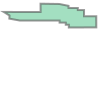

In [8]:
df.iloc[2222].geometry

#### Subsetting

<AxesSubplot:>

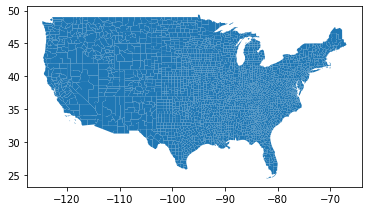

In [9]:
# You can subset using standard Pandas
idx = (df['STATE_NAME'] != 'Alaska') & (df['STATE_NAME'] != 'Hawaii') & (df['STATE_NAME'] != 'Puerto Rico')
conus = df[idx]

# And use a built-in plot routine to visualize
conus.plot()

#### Field Calculation

C:\Users\tpingel\Anaconda3\envs\neil\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

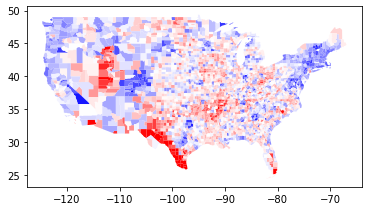

In [10]:
# You can calculate fields:
conus['change'] = conus['gop_minus_dem_prc_2020'] - conus['gop_minus_dem_prc_2016']

# And construct choropleth maps:
conus.plot(column='change',cmap='bwr',vmin=-15,vmax=15)

#### Format Conversion

In [164]:
# Read in, in one format:
df = geopandas.read_file('https://github.com/thomaspingel/geodata/raw/master/election/election.gpkg')

# Write out in another:
df.to_file('out.geojson',driver='GeoJSON')

#### Dissolve

<AxesSubplot:>

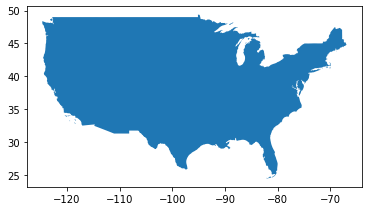

In [11]:
# You can dissolve features together, either all at once, or by a variable:

conus_outline = conus.dissolve()
conus_outline.plot()

<AxesSubplot:>

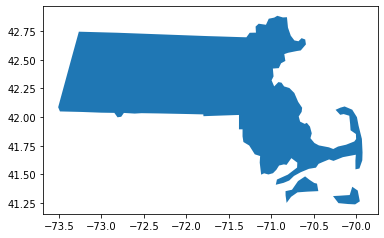

In [12]:
idx = df['STATE_NAME'] == 'Massachusetts'
massachusetts = df[idx].dissolve()
massachusetts.plot()

#### Converting a CSV with lat/lon to a GeoDataFrame

     lon    lat  temp                    geometry
0 -80.28  25.82  22.8  POINT (-80.28000 25.82000)
1 -80.10  26.68  21.3  POINT (-80.10000 26.68000)
2 -81.32  28.43  17.9  POINT (-81.32000 28.43000)
3 -81.70  30.40  15.5  POINT (-81.70000 30.40000)
4 -82.53  27.97  17.3  POINT (-82.53000 27.97000)


<AxesSubplot:>

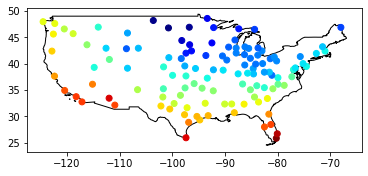

In [15]:
# Reading in CSV files can be done with Pandas, and then convert to geodata with GeoPandas

df = pd.read_csv('https://github.com/thomaspingel/geodata/raw/master/temperature.csv')
df = geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.lon,df.lat))
print(df.head())

# Plot, but add a basemap
basemap = conus_outline.plot(color='white',edgecolor='black')
df.plot(column='temp',ax=basemap,cmap='jet')

#### Geocoding

In [18]:
# Suppose you have a list of addresses

fn = 'https://gist.githubusercontent.com/HeroicEric/1102788/raw/0bcb298bd75513a398bf353ce7162177350813c9/gistfile1.txt'

df = pd.read_csv(fn,header=None,names=['address'],sep='\n')
df = df.iloc[:10]  # Keep only the first 10, for testing
print(df.head())

geocoded = geopandas.tools.geocode(df.address,provider='arcgis')

                                   address
0    777 Brockton Avenue, Abington MA 2351
1          30 Memorial Drive, Avon MA 2322
2  250 Hartford Avenue, Bellingham MA 2019
3         700 Oak Street, Brockton MA 2301
4    66-4 Parkhurst Rd, Chelmsford MA 1824


<AxesSubplot:>

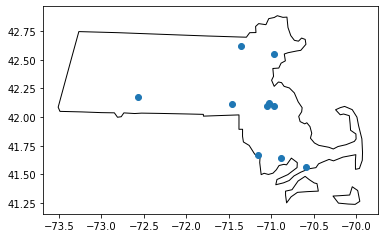

In [136]:
basemap = massachusetts.plot(color='white',edgecolor='black')
geocoded.plot(ax=basemap)

#### Merges (Joins)

In [19]:
# Load just the vector geometry, this time from a geojson
geometry_data = geopandas.read_file('https://raw.githubusercontent.com/thomaspingel/geodata/master/cartographic_boundary_files/cb_2018_state/cb_2014_us_state_20m.geojson')
geometry_data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"MULTIPOLYGON Z (((-77.11976 38.93434 0.00000, ..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"MULTIPOLYGON Z (((-85.60516 34.98468 0.00000, ..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"MULTIPOLYGON Z (((-117.24303 44.39097 0.00000,..."


In [20]:
# Now load some simple CSV data
attribute_data = pd.read_csv('https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2020.csv')
attribute_data.head()

,state,state_po,FIPS,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,ALABAMA,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,2123372,62.08,34.36,27.72,1441170,849624,2323282,62.03,36.57,25.46
1,ALASKA,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,318608,51.28,36.55,14.73,189951,153778,359530,52.83,42.77,10.06
2,ARIZONA,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,2573165,48.67,45.13,3.54,1661686,1672143,3387326,49.06,49.36,-0.30
3,ARKANSAS,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,1130635,60.57,33.65,26.92,760647,423932,1219069,62.40,34.78,27.62
4,CALIFORNIA,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,14181595,31.62,61.73,-30.11,6006429,11110250,17500881,34.32,63.48,-29.16


In [21]:
df = geometry_data.merge(attribute_data,how='left',left_on='STUSPS',right_on='state_po')
df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",...,14181595,31.62,61.73,-30.11,6006429,11110250,17500881,34.32,63.48,-29.16
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"MULTIPOLYGON Z (((-77.11976 38.93434 0.00000, ...",...,312575,4.07,90.48,-86.41,18586,317323,344356,5.40,92.15,-86.75
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",...,9420039,49.02,47.82,1.20,5668731,5297045,11067456,51.22,47.86,3.36
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"MULTIPOLYGON Z (((-85.60516 34.98468 0.00000, ...",...,4114732,50.77,45.64,5.13,2461854,2473633,4999960,49.24,49.47,-0.23
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"MULTIPOLYGON Z (((-117.24303 44.39097 0.00000,...",...,690255,59.26,27.49,31.77,554119,287021,868014,63.84,33.07,30.77


#### Projection

<AxesSubplot:>

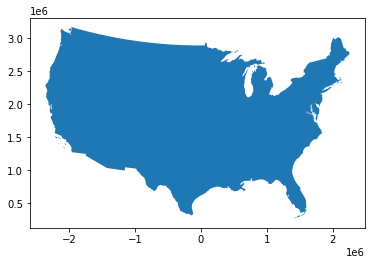

In [167]:
# Using an EPSG code

conus_outline.to_crs(epsg=5070).plot()

<AxesSubplot:>

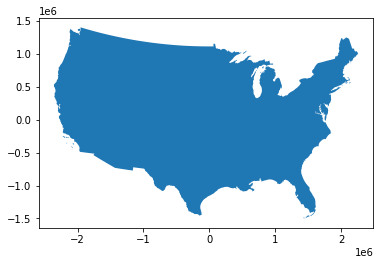

In [168]:
# Using a Proj.4 string:

conus_outline.to_crs(crs='+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs').plot()

#### What else can it do?

Buffering, spatial joins and many, many more things!  Through simple syntax, you can do almost any common GIS operation.

## PyProj, Fiona, and Shapely

These are dependencies of geopandas and rasterio.  Much of the low-level processing happens here.

In [171]:
# For instance, a simple coordinate transformer:

from pyproj import Transformer

'''
EPSG Hints:
Google searches that hit epsg.io are the fastest:
Google: "wgs84 zone 59N" hits
https://epsg.io/32759
wgs84 = 4326
WGS84 UTM is 326xx or 327xx (e.g., zone 17 is 32617; lookup with epsg.io)
'''

def coord_transform(x,y,from_epsg,to_epsg):
    transformer = Transformer.from_crs(from_epsg,to_epsg,always_xy=True)
    return transformer.transform(x,y)

y,x = 37.2185455,-80.4215239
coord_transform(x,y,4326,32617)

# Compare to https://epsg.io/transform#s_srs=4326&t_srs=32617&x=-80.4215238&y=37.2185455

(551323.0803127652, 4119273.494590037)

## Other Recommendations

* [Rasterstats](https://pythonhosted.org/rasterstats/) for zonal statistics, interpolation, etc.
* [GeoPlot](https://residentmario.github.io/geoplot/) for more sophisticated mapping.  See the [gallery](https://residentmario.github.io/geoplot/gallery/index.html) for inspiration.
* [PSAL](https://pysal.org/) and [Tobler](https://pysal.org/tobler/) for spatial statistics.
* [PyKriging](https://pykriging.com/) for geospatial interpolation.
* [Navpy](https://pypi.org/project/NavPy/) and [Nvector](https://pypi.org/project/nvector/) for Geodesy.
* [GeoPy](https://geopy.readthedocs.io/en/stable/) for simple geocoding (this is what powers the one in geopandas)